In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Línea mágica para mostrar gráficos en el notebook
%matplotlib inline

### Preprocesamiento de los Datos

- Se eliminaron valores nulos si existían (aunque el dataset no los tenía).
- Se aplicó `StandardScaler` para normalizar.
- Se usó `pd.get_dummies()` para variables categóricas.
- Se dividieron los datos en 80% entrenamiento y 20% prueba.

In [35]:

df = pd.read_csv("car data.csv")
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(df.head()) # Imprimir las primeras filas para verificar la carga

df = pd.get_dummies(df, drop_first=True)

X = df.drop(columns=['Selling_Price'])
y = df['Selling_Price']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)

  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  
Tamaño del conjunto de entrenamiento: (240, 105)
Tamaño del conjunto de prueba: (61, 105)


In [37]:
modelo_lineal = LinearRegression()
modelo_lineal.fit(X_train, y_train)
y_pred_lineal = modelo_lineal.predict(X_test)

y_binary = (y > y.median()).astype(int)

X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_scaled, y_binary, test_size=0.2, random_state=42)

modelo_logistico = LogisticRegression()
modelo_logistico.fit(X_train_bin, y_train_bin)
y_pred_logistico = modelo_logistico.predict(X_test_bin)

modelo_arbol = DecisionTreeRegressor()
modelo_arbol.fit(X_train, y_train)
y_pred_arbol = modelo_arbol.predict(X_test)

print("Modelo entrenado con éxito")

Modelo entrenado con éxito


In [39]:
print("🔹 Evaluación Regresión Lineal")
print("R^2 Score:", modelo_lineal.score(X_test, y_test))

print("\n🔹 Evaluación Regresión Logística")
print("Accuracy:", accuracy_score(y_test_bin, y_pred_logistico))
print(classification_report(y_test_bin, y_pred_logistico))

# Specificity para Regresión Logística
cm_log = confusion_matrix(y_test_bin, y_pred_logistico)
tn, fp, fn, tp = cm_log.ravel()
specificity_log = tn / (tn + fp)
print(f"Specificity (Regresión Logística): {specificity_log:.4f}")

y_pred_arbol_bin = (y_pred_arbol > y.median()).astype(int)

print("\n🔹 Evaluación Árbol de Decisión")
print("Accuracy:", accuracy_score(y_test_bin, y_pred_arbol_bin))
print(classification_report(y_test_bin, y_pred_arbol_bin))

# Specificity para Árbol de Decisión
cm_tree = confusion_matrix(y_test_bin, y_pred_arbol_bin)
tn, fp, fn, tp = cm_tree.ravel()
specificity_tree = tn / (tn + fp)
print(f"Specificity (Árbol de Decisión): {specificity_tree:.4f}")

🔹 Evaluación Regresión Lineal
R^2 Score: 0.5995038184042526

🔹 Evaluación Regresión Logística
Accuracy: 0.9180327868852459
              precision    recall  f1-score   support

           0       0.93      0.90      0.91        29
           1       0.91      0.94      0.92        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61

Specificity (Regresión Logística): 0.8966

🔹 Evaluación Árbol de Decisión
Accuracy: 0.9672131147540983
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        29
           1       1.00      0.94      0.97        32

    accuracy                           0.97        61
   macro avg       0.97      0.97      0.97        61
weighted avg       0.97      0.97      0.97        61

Specificity (Árbol de Decisión): 1.0000


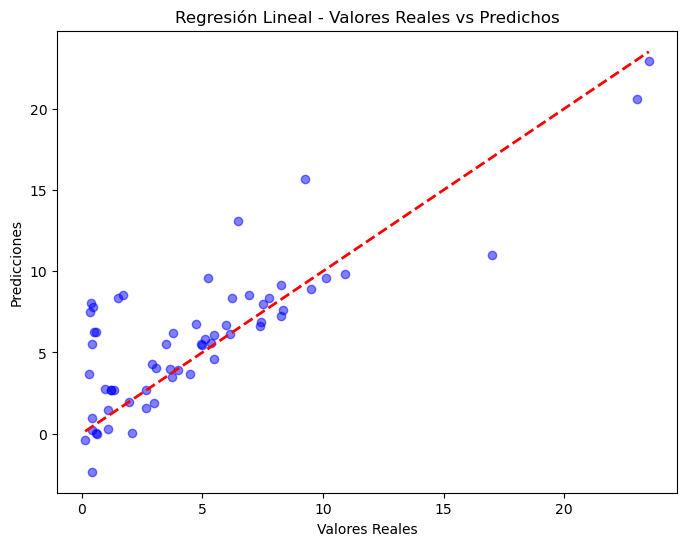

In [41]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lineal, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Regresión Lineal - Valores Reales vs Predichos")
plt.show()

In [43]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicciones")
    plt.ylabel("Valores Reales")
    plt.title(title)
    plt.show()

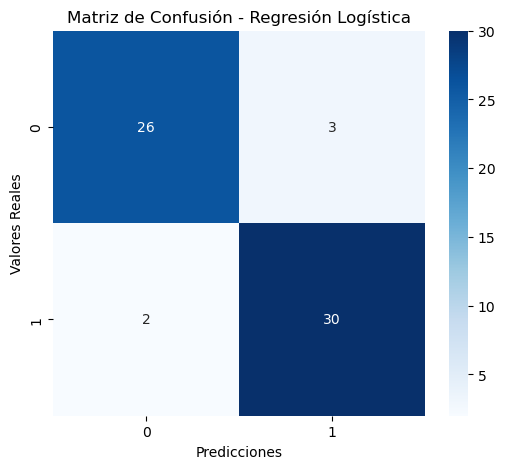

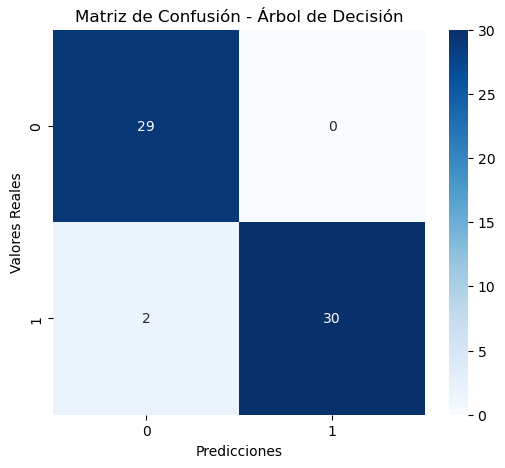

In [45]:
plot_confusion_matrix(y_test_bin, y_pred_logistico, "Matriz de Confusión - Regresión Logística")
plot_confusion_matrix(y_test_bin, y_pred_arbol_bin, "Matriz de Confusión - Árbol de Decisión")

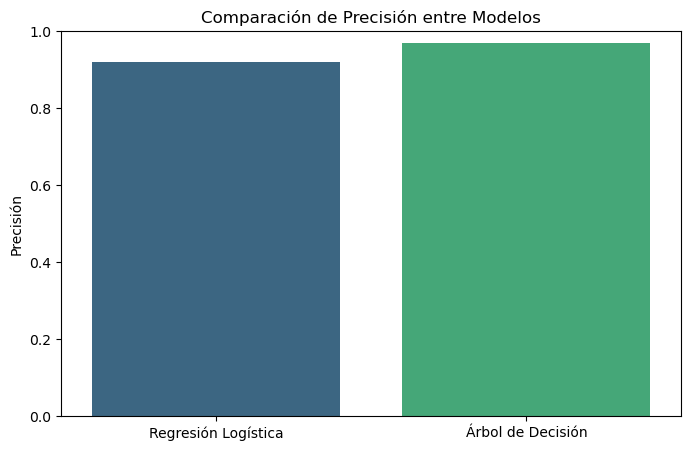

In [47]:
modelos = ["Regresión Logística", "Árbol de Decisión"]
accuracy_scores = [accuracy_score(y_test_bin, y_pred_logistico), accuracy_score(y_test_bin, y_pred_arbol_bin)]
plt.figure(figsize=(8, 5))
sns.barplot(x=modelos, y=accuracy_scores, hue=modelos, palette="viridis", legend=False)
plt.ylim(0, 1)
plt.ylabel("Precisión")
plt.title("Comparación de Precisión entre Modelos")
plt.show()

In [25]:
df1 = pd.read_csv("CAR DETAILS FROM CAR DEKHO.csv")
print(df1.head())
df2 = pd.read_csv("car details v3.csv")
print(df2.head())
df3 = pd.read_csv("car details v4.csv")
print(df3.head())




                       name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007          60000      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3    Datsun RediGO T Option  2017         250000      46000  Petrol   
4     Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  Individual       Manual   First Owner  
2  Individual       Manual   First Owner  
3  Individual       Manual   First Owner  
4  Individual       Manual  Second Owner  
                           name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i

In [65]:
print("Información de las columnas de df:")
print(df.info())

print("\nInformación de las columnas de df1:")
print(df1.info())

print("\nInformación de las columnas de df2:")
print(df2.info())

print("\nInformación de las columnas de df3:")
print(df3.info())

Información de las columnas de df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Columns: 106 entries, Year to Transmission_Manual
dtypes: bool(101), float64(2), int64(3)
memory usage: 41.6 KB
None

Información de las columnas de df1:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Columns: 1504 entries, year to owner_Third Owner
dtypes: bool(1501), int64(3)
memory usage: 6.3 MB
None

Información de las columnas de df2:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8


--- Análisis para df1 ---

Primeras filas de df1:
                       name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007          60000      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3    Datsun RediGO T Option  2017         250000      46000  Petrol   
4     Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  Individual       Manual   First Owner  
2  Individual       Manual   First Owner  
3  Individual       Manual   First Owner  
4  Individual       Manual  Second Owner  

Tamaño del conjunto de entrenamiento (df1): (3472, 1503)
Tamaño del conjunto de prueba (df1): (868, 1503)

Modelos entrenados con éxito (df1)

🔹 Evaluación Regresión Lineal (df1)
R^2 Score: 0.6011491180509267

🔹 Evaluación Regresión Logística (df1)
Accuracy: 0.90

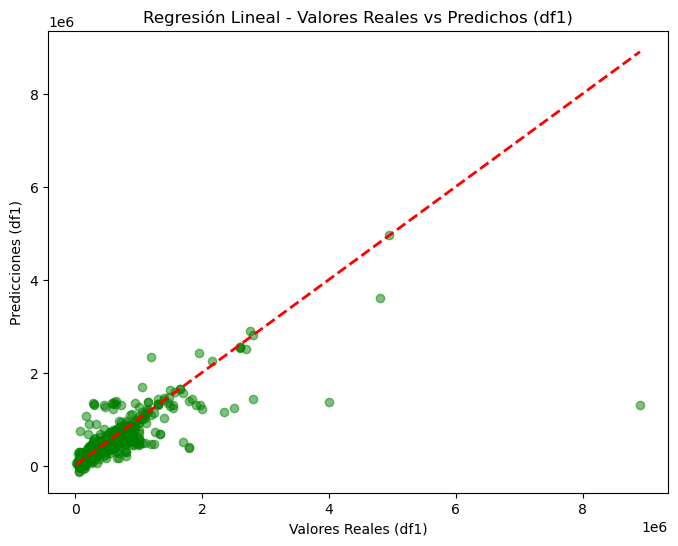

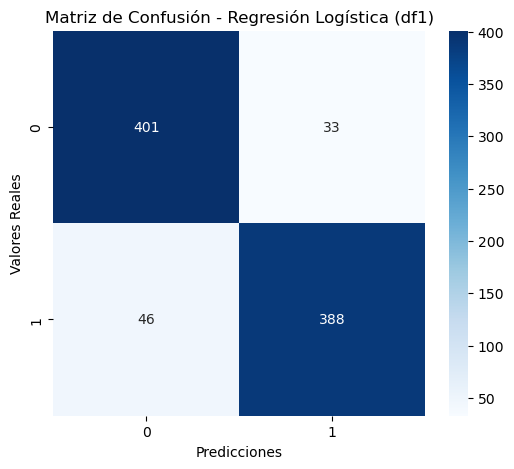

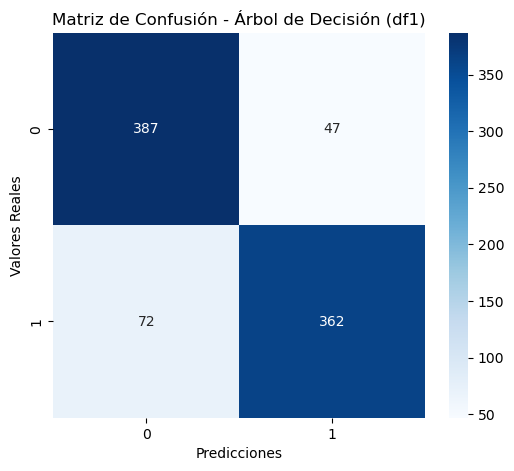

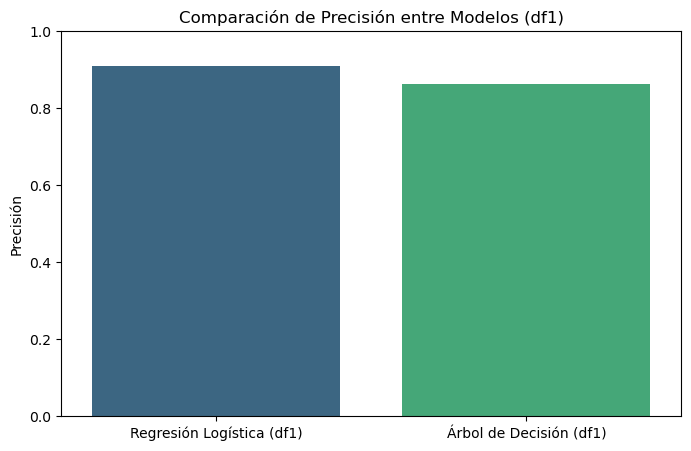

In [51]:
# Análisis para df1
print("\n--- Análisis para df1 ---")

# Cargar el dataset df1 (asegúrate de que ya lo has cargado previamente)
df1 = pd.read_csv("CAR DETAILS FROM CAR DEKHO.csv")

# Mostrar las primeras filas de df1
print("\nPrimeras filas de df1:")
print(df1.head())

# Convertir variables categóricas a numéricas usando one-hot encoding
df1 = pd.get_dummies(df1, drop_first=True)

# Definir variables predictoras (X) y variable objetivo (y)
# La variable objetivo sigue siendo 'selling_price'
X_df1 = df1.drop(columns=['selling_price'])
y_df1 = df1['selling_price']

# Escalar las variables predictoras numéricas
scaler_df1 = StandardScaler()
X_scaled_df1 = scaler_df1.fit_transform(X_df1)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_df1, X_test_df1, y_train_df1, y_test_df1 = train_test_split(X_df1, y_df1, test_size=0.2, random_state=42)
print("\nTamaño del conjunto de entrenamiento (df1):", X_train_df1.shape)
print("Tamaño del conjunto de prueba (df1):", X_test_df1.shape)

# Entrenar modelo de Regresión Lineal
modelo_lineal_df1 = LinearRegression()
modelo_lineal_df1.fit(X_train_df1, y_train_df1)
y_pred_lineal_df1 = modelo_lineal_df1.predict(X_test_df1)

# Crear variable binaria para la Regresión Logística y Árbol de Decisión
y_binary_df1 = (y_df1 > y_df1.median()).astype(int)

# Dividir los datos escalados para la Regresión Logística
X_train_bin_df1, X_test_bin_df1, y_train_bin_df1, y_test_bin_df1 = train_test_split(X_scaled_df1, y_binary_df1, test_size=0.2, random_state=42)

# Entrenar modelo de Regresión Logística
modelo_logistico_df1 = LogisticRegression()
modelo_logistico_df1.fit(X_train_bin_df1, y_train_bin_df1)
y_pred_logistico_df1 = modelo_logistico_df1.predict(X_test_bin_df1)

# Entrenar modelo de Árbol de Decisión
modelo_arbol_df1 = DecisionTreeRegressor()
modelo_arbol_df1.fit(X_train_df1, y_train_df1)
y_pred_arbol_df1 = modelo_arbol_df1.predict(X_test_df1)

print("\nModelos entrenados con éxito (df1)")

# 🔹 Evaluación de los Modelos (df1)
print("\n🔹 Evaluación Regresión Lineal (df1)")
print("R^2 Score:", modelo_lineal_df1.score(X_test_df1, y_test_df1))

print("\n🔹 Evaluación Regresión Logística (df1)")
print("Accuracy:", accuracy_score(y_test_bin_df1, y_pred_logistico_df1))
print(classification_report(y_test_bin_df1, y_pred_logistico_df1))

# Calcular Specificity (df1)
cm_log_df1 = confusion_matrix(y_test_bin_df1, y_pred_logistico_df1)
specificity_log_df1 = cm_log_df1[0, 0] / (cm_log_df1[0, 0] + cm_log_df1[0, 1])
print("Specificity (Regresión Logística - df1):", round(specificity_log_df1, 4))

# Convertir predicciones del árbol de decisión a binario para la evaluación
y_pred_arbol_bin_df1 = (y_pred_arbol_df1 > y_df1.median()).astype(int)

print("\n🔹 Evaluación Árbol de Decisión (df1)")
print("Accuracy:", accuracy_score(y_test_bin_df1, y_pred_arbol_bin_df1))
print(classification_report(y_test_bin_df1, y_pred_arbol_bin_df1))

cm_arbol_df1 = confusion_matrix(y_test_bin_df1, y_pred_arbol_bin_df1)
specificity_arbol_df1 = cm_arbol_df1[0, 0] / (cm_arbol_df1[0, 0] + cm_arbol_df1[0, 1])
print("Specificity (Árbol de Decisión - df1):", round(specificity_arbol_df1, 4))

# Gráfico de dispersión para Regresión Lineal (df1)
plt.figure(figsize=(8, 6))
plt.scatter(y_test_df1, y_pred_lineal_df1, alpha=0.5, color='green')
plt.plot([y_test_df1.min(), y_test_df1.max()], [y_test_df1.min(), y_test_df1.max()], '--r', linewidth=2)
plt.xlabel("Valores Reales (df1)")
plt.ylabel("Predicciones (df1)")
plt.title("Regresión Lineal - Valores Reales vs Predichos (df1)")
plt.show()

# Función para graficar la matriz de confusión (si no la has definido ya)
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicciones")
    plt.ylabel("Valores Reales")
    plt.title(title)
    plt.show()

# Graficar matrices de confusión (df1)
plot_confusion_matrix(y_test_bin_df1, y_pred_logistico_df1, "Matriz de Confusión - Regresión Logística (df1)")
plot_confusion_matrix(y_test_bin_df1, y_pred_arbol_bin_df1, "Matriz de Confusión - Árbol de Decisión (df1)")

# Crear un diccionario con las métricas de cada modelo (df1)
modelos_df1 = ["Regresión Logística (df1)", "Árbol de Decisión (df1)"]
accuracy_scores_df1 = [accuracy_score(y_test_bin_df1, y_pred_logistico_df1), accuracy_score(y_test_bin_df1, y_pred_arbol_bin_df1)]

# Gráfico de barras para comparar la precisión de los modelos (df1)
plt.figure(figsize=(8, 5))
sns.barplot(x=modelos_df1, y=accuracy_scores_df1, hue=modelos_df1, palette="viridis", legend=False)
plt.ylim(0, 1)
plt.ylabel("Precisión")
plt.title("Comparación de Precisión entre Modelos (df1)")
plt.show()



--- Análisis para df2 ---

Primeras filas de df2:
                           name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   Third Owner   17.7 kmpl  1497 CC      78 bhp   
3  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
4  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   

                     torque  seats 

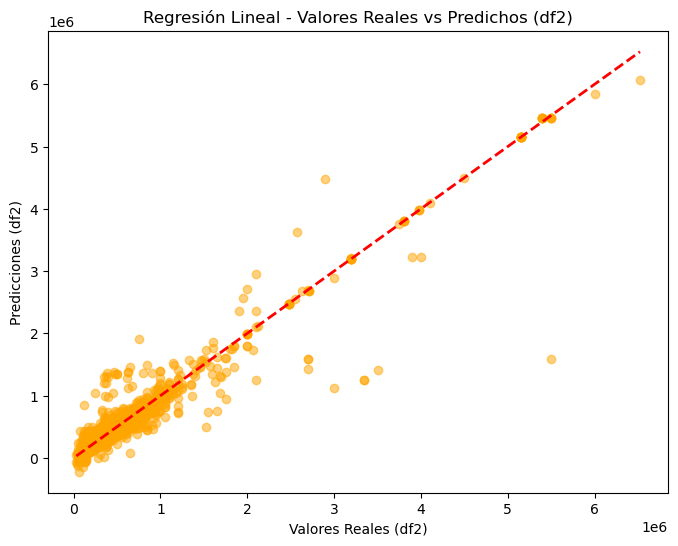

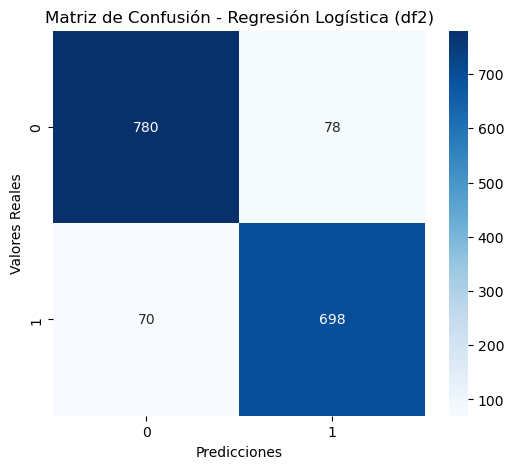

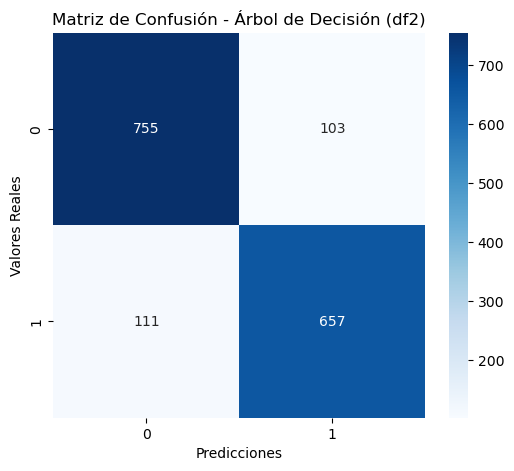

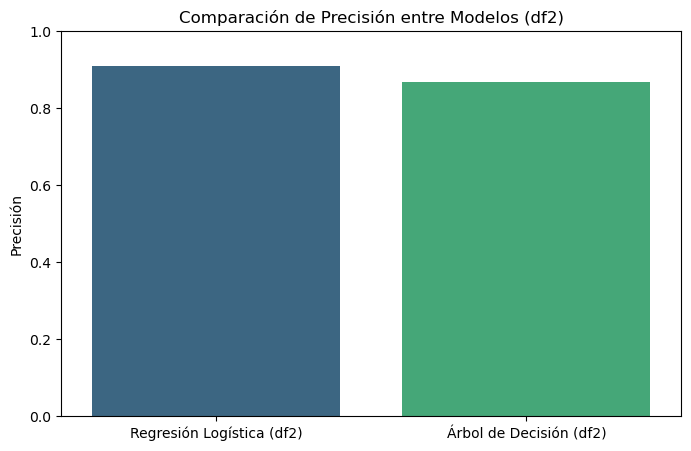

In [57]:
print("\n--- Análisis para df2 ---")

# Cargar el dataset df2 (asegúrate de que ya lo has cargado previamente)
df2 = pd.read_csv("Car details v3.csv")

# Mostrar las primeras filas de df2
print("\nPrimeras filas de df2:")
print(df2.head())

# Preprocesamiento de columnas adicionales (mileage, engine, max_power, torque, seats)
# Esto requerirá un preprocesamiento específico para extraer valores numéricos
# y manejar valores faltantes. Por ahora, nos centraremos en las columnas comunes.

# Seleccionar las columnas comunes para un análisis similar a df y df1
df2_subset = df2[['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner']].copy()

# Convertir variables categóricas a numéricas usando one-hot encoding
df2_processed = pd.get_dummies(df2_subset, drop_first=True)

# Definir variables predictoras (X) y variable objetivo (y)
# La variable objetivo sigue siendo 'selling_price'
X_df2 = df2_processed.drop(columns=['selling_price'])
y_df2 = df2_processed['selling_price']

# Escalar las variables predictoras numéricas
scaler_df2 = StandardScaler()
X_scaled_df2 = scaler_df2.fit_transform(X_df2)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_df2, X_test_df2, y_train_df2, y_test_df2 = train_test_split(X_df2, y_df2, test_size=0.2, random_state=42)
print("\nTamaño del conjunto de entrenamiento (df2):", X_train_df2.shape)
print("Tamaño del conjunto de prueba (df2):", X_test_df2.shape)

# Entrenar modelo de Regresión Lineal
modelo_lineal_df2 = LinearRegression()
modelo_lineal_df2.fit(X_train_df2, y_train_df2)
y_pred_lineal_df2 = modelo_lineal_df2.predict(X_test_df2)

# Crear variable binaria para la Regresión Logística y Árbol de Decisión
y_binary_df2 = (y_df2 > y_df2.median()).astype(int)

# Dividir los datos escalados para la Regresión Logística
X_train_bin_df2, X_test_bin_df2, y_train_bin_df2, y_test_bin_df2 = train_test_split(X_scaled_df2, y_binary_df2, test_size=0.2, random_state=42)

# Entrenar modelo de Regresión Logística
modelo_logistico_df2 = LogisticRegression()
modelo_logistico_df2.fit(X_train_bin_df2, y_train_bin_df2)
y_pred_logistico_df2 = modelo_logistico_df2.predict(X_test_bin_df2)

# Entrenar modelo de Árbol de Decisión
modelo_arbol_df2 = DecisionTreeRegressor()
modelo_arbol_df2.fit(X_train_df2, y_train_df2)
y_pred_arbol_df2 = modelo_arbol_df2.predict(X_test_df2)

print("\nModelos entrenados con éxito (df2)")

# 🔹 Evaluación de los Modelos (df2)
print("\n🔹 Evaluación Regresión Lineal (df2)")
print("R^2 Score:", modelo_lineal_df2.score(X_test_df2, y_test_df2))

print("\n🔹 Evaluación Regresión Logística (df2)")
print("Accuracy:", accuracy_score(y_test_bin_df2, y_pred_logistico_df2))
print(classification_report(y_test_bin_df2, y_pred_logistico_df2))

cm_log_df2 = confusion_matrix(y_test_bin_df2, y_pred_logistico_df2)
specificity_log_df2 = cm_log_df2[0, 0] / (cm_log_df2[0, 0] + cm_log_df2[0, 1])
print("Specificity (Regresión Logística - df2):", round(specificity_log_df2, 4))

# Convertir predicciones del árbol de decisión a binario para la evaluación
y_pred_arbol_bin_df2 = (y_pred_arbol_df2 > y_df2.median()).astype(int)

print("\n🔹 Evaluación Árbol de Decisión (df2)")
print("Accuracy:", accuracy_score(y_test_bin_df2, y_pred_arbol_bin_df2))
print(classification_report(y_test_bin_df2, y_pred_arbol_bin_df2))

cm_arbol_df2 = confusion_matrix(y_test_bin_df2, y_pred_arbol_bin_df2)
specificity_arbol_df2 = cm_arbol_df2[0, 0] / (cm_arbol_df2[0, 0] + cm_arbol_df2[0, 1])
print("Specificity (Árbol de Decisión - df2):", round(specificity_arbol_df2, 4))

# Gráfico de dispersión para Regresión Lineal (df2)
plt.figure(figsize=(8, 6))
plt.scatter(y_test_df2, y_pred_lineal_df2, alpha=0.5, color='orange')
plt.plot([y_test_df2.min(), y_test_df2.max()], [y_test_df2.min(), y_test_df2.max()], '--r', linewidth=2)
plt.xlabel("Valores Reales (df2)")
plt.ylabel("Predicciones (df2)")
plt.title("Regresión Lineal - Valores Reales vs Predichos (df2)")
plt.show()

# Graficar matrices de confusión (df2)
plot_confusion_matrix(y_test_bin_df2, y_pred_logistico_df2, "Matriz de Confusión - Regresión Logística (df2)")
plot_confusion_matrix(y_test_bin_df2, y_pred_arbol_bin_df2, "Matriz de Confusión - Árbol de Decisión (df2)")
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicciones")
    plt.ylabel("Valores Reales")
    plt.title(title)
    plt.show()
# Crear un diccionario con las métricas de cada modelo (df2)
modelos_df2 = ["Regresión Logística (df2)", "Árbol de Decisión (df2)"]
accuracy_scores_df2 = [accuracy_score(y_test_bin_df2, y_pred_logistico_df2), accuracy_score(y_test_bin_df2, y_pred_arbol_bin_df2)]

# Gráfico de barras para comparar la precisión de los modelos (df2)
plt.figure(figsize=(8, 5))
sns.barplot(x=modelos_df2, y=accuracy_scores_df2, hue=modelos_df2, palette="viridis", legend=False)
plt.ylim(0, 1)
plt.ylabel("Precisión")
plt.title("Comparación de Precisión entre Modelos (df2)")
plt.show()


--- Análisis para df3 ---

Primeras filas de df3:
            Make                            Model    Price  Year  Kilometer  \
0          Honda              Amaze 1.2 VX i-VTEC   505000  2017      87150   
1  Maruti Suzuki                  Swift DZire VDI   450000  2014      75000   
2        Hyundai             i10 Magna 1.2 Kappa2   220000  2011      67000   
3         Toyota                         Glanza G   799000  2019      37500   
4         Toyota  Innova 2.4 VX 7 STR [2016-2020]  1950000  2018      69000   

  Fuel Type Transmission   Location   Color   Owner Seller Type   Engine  \
0    Petrol       Manual       Pune    Grey   First   Corporate  1198 cc   
1    Diesel       Manual   Ludhiana   White  Second  Individual  1248 cc   
2    Petrol       Manual    Lucknow  Maroon   First  Individual  1197 cc   
3    Petrol       Manual  Mangalore     Red   First  Individual  1197 cc   
4    Diesel       Manual     Mumbai    Grey   First  Individual  2393 cc   

            Max P

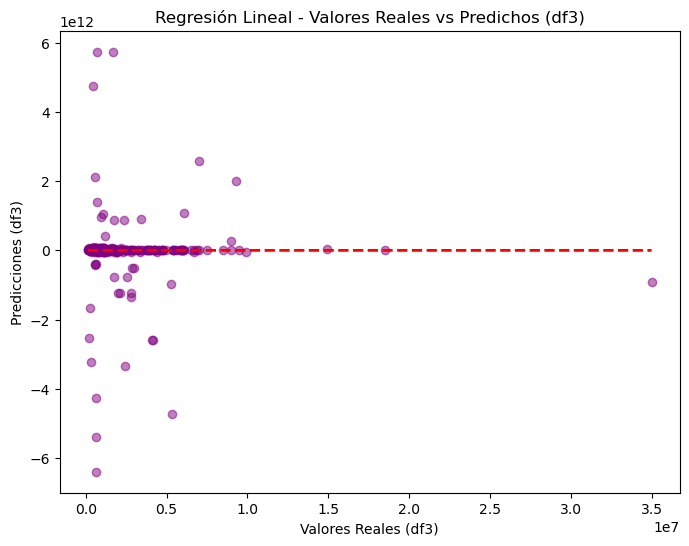

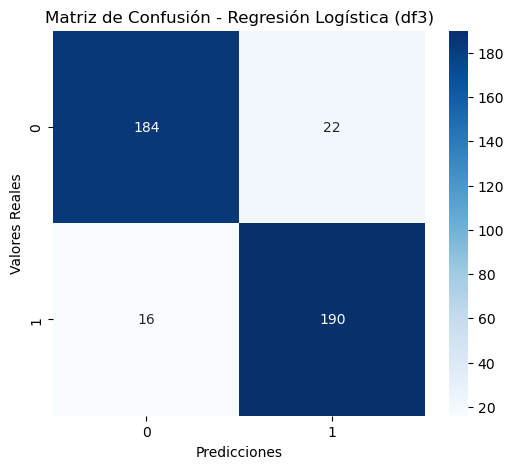

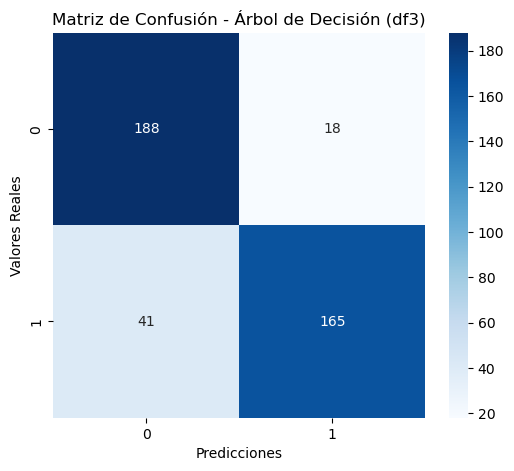

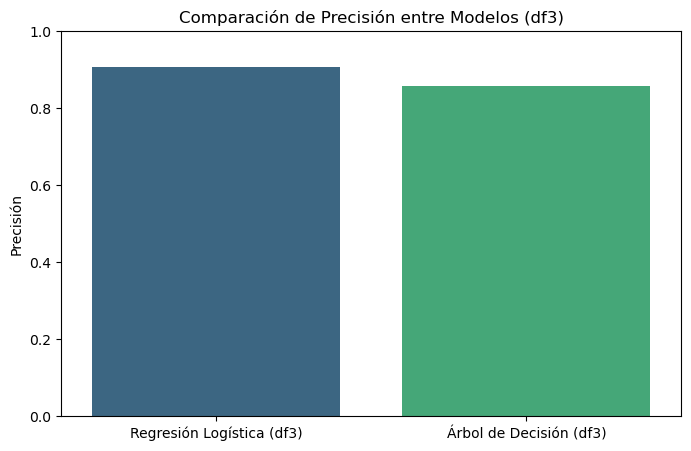

In [63]:
print("\n--- Análisis para df3 ---")

# Cargar el dataset df3 (asegúrate de que ya lo has cargado previamente)
df3 = pd.read_csv("car details v4.csv")

# Mostrar las primeras filas de df3
print("\nPrimeras filas de df3:")
print(df3.head())

# Renombrar columnas para que sean más consistentes con df y df1
df3_renamed = df3.rename(columns={'Make': 'make',
                                   'Model': 'name',  # Usaremos 'Model' como el nombre del coche
                                   'Price': 'selling_price',
                                   'Year': 'year',
                                   'Kilometer': 'km_driven',
                                   'Fuel Type': 'fuel',
                                   'Seller Type': 'seller_type',
                                   'Transmission': 'transmission',
                                   'Owner': 'owner'})

# Seleccionar las columnas que corresponden a las de df y df1
df3_subset = df3_renamed[['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner']].copy()

# Convertir variables categóricas a numéricas usando one-hot encoding
df3_processed = pd.get_dummies(df3_subset, drop_first=True)

# Definir variables predictoras (X) y variable objetivo (y)
# La variable objetivo es 'selling_price'
X_df3 = df3_processed.drop(columns=['selling_price'])
y_df3 = df3_processed['selling_price']

# Escalar las variables predictoras numéricas
scaler_df3 = StandardScaler()
X_scaled_df3 = scaler_df3.fit_transform(X_df3)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_df3, X_test_df3, y_train_df3, y_test_df3 = train_test_split(X_df3, y_df3, test_size=0.2, random_state=42)
print("\nTamaño del conjunto de entrenamiento (df3):", X_train_df3.shape)
print("Tamaño del conjunto de prueba (df3):", X_test_df3.shape)

# Entrenar modelo de Regresión Lineal
modelo_lineal_df3 = LinearRegression()
modelo_lineal_df3.fit(X_train_df3, y_train_df3)
y_pred_lineal_df3 = modelo_lineal_df3.predict(X_test_df3)

# Crear variable binaria para la Regresión Logística y Árbol de Decisión
y_binary_df3 = (y_df3 > y_df3.median()).astype(int)

# Dividir los datos escalados para la Regresión Logística
X_train_bin_df3, X_test_bin_df3, y_train_bin_df3, y_test_bin_df3 = train_test_split(X_scaled_df3, y_binary_df3, test_size=0.2, random_state=42)

# Entrenar modelo de Regresión Logística
modelo_logistico_df3 = LogisticRegression()
modelo_logistico_df3.fit(X_train_bin_df3, y_train_bin_df3)
y_pred_logistico_df3 = modelo_logistico_df3.predict(X_test_bin_df3)

# Entrenar modelo de Árbol de Decisión
modelo_arbol_df3 = DecisionTreeRegressor()
modelo_arbol_df3.fit(X_train_df3, y_train_df3)
y_pred_arbol_df3 = modelo_arbol_df3.predict(X_test_df3)

print("\nModelos entrenados con éxito (df3)")

# 🔹 Evaluación de los Modelos (df3)
print("\n🔹 Evaluación Regresión Lineal (df3)")
print("R^2 Score:", modelo_lineal_df3.score(X_test_df3, y_test_df3))

print("\n🔹 Evaluación Regresión Logística (df3)")
print("Accuracy:", accuracy_score(y_test_bin_df3, y_pred_logistico_df3))
print(classification_report(y_test_bin_df3, y_pred_logistico_df3))

cm_log_df3 = confusion_matrix(y_test_bin_df3, y_pred_logistico_df3)
specificity_log_df3 = cm_log_df3[0, 0] / (cm_log_df3[0, 0] + cm_log_df3[0, 1])
print("Specificity (Regresión Logística - df3):", round(specificity_log_df3, 4))

# Convertir predicciones del árbol de decisión a binario para la evaluación
y_pred_arbol_bin_df3 = (y_pred_arbol_df3 > y_df3.median()).astype(int)

print("\n🔹 Evaluación Árbol de Decisión (df3)")
print("Accuracy:", accuracy_score(y_test_bin_df3, y_pred_arbol_bin_df3))
print(classification_report(y_test_bin_df3, y_pred_arbol_bin_df3))

cm_arbol_df3 = confusion_matrix(y_test_bin_df3, y_pred_arbol_bin_df3)
specificity_arbol_df3 = cm_arbol_df3[0, 0] / (cm_arbol_df3[0, 0] + cm_arbol_df3[0, 1])
print("Specificity (Árbol de Decisión - df3):", round(specificity_arbol_df3, 4))

# Gráfico de dispersión para Regresión Lineal (df3)
plt.figure(figsize=(8, 6))
plt.scatter(y_test_df3, y_pred_lineal_df3, alpha=0.5, color='purple')
plt.plot([y_test_df3.min(), y_test_df3.max()], [y_test_df3.min(), y_test_df3.max()], '--r', linewidth=2)
plt.xlabel("Valores Reales (df3)")
plt.ylabel("Predicciones (df3)")
plt.title("Regresión Lineal - Valores Reales vs Predichos (df3)")
plt.show()

# Graficar matrices de confusión (df3)
plot_confusion_matrix(y_test_bin_df3, y_pred_logistico_df3, "Matriz de Confusión - Regresión Logística (df3)")
plot_confusion_matrix(y_test_bin_df3, y_pred_arbol_bin_df3, "Matriz de Confusión - Árbol de Decisión (df3)")

# Crear un diccionario con las métricas de cada modelo (df3)
modelos_df3 = ["Regresión Logística (df3)", "Árbol de Decisión (df3)"]
accuracy_scores_df3 = [accuracy_score(y_test_bin_df3, y_pred_logistico_df3), accuracy_score(y_test_bin_df3, y_pred_arbol_bin_df3)]

# Gráfico de barras para comparar la precisión de los modelos (df3)
plt.figure(figsize=(8, 5))
sns.barplot(x=modelos_df3, y=accuracy_scores_df3, hue=modelos_df3, palette="viridis", legend=False)
plt.ylim(0, 1)
plt.ylabel("Precisión")
plt.title("Comparación de Precisión entre Modelos (df3)")
plt.show()